In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-marketing/bank-additional-full.csv
/kaggle/input/bank-marketing/bank-additional-names.txt


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('/kaggle/input/bank-marketing/bank-additional-full.csv', sep = ';')
df['y'] = pd.get_dummies(df['y'], columns = ['y'], prefix = ['y'], drop_first = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [4]:
print('Info\n', df.info())
print('Describe\n', df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
print('Jobs:\n', df['job'].unique())
print('Marital:\n', df['marital'].unique())
print('Education:\n', df['education'].unique())
print('Default:\n', df['default'].unique())
print('Housing:\n', df['housing'].unique())
print('Loan:\n', df['loan'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ac3bebad0>,
      dtype=object)

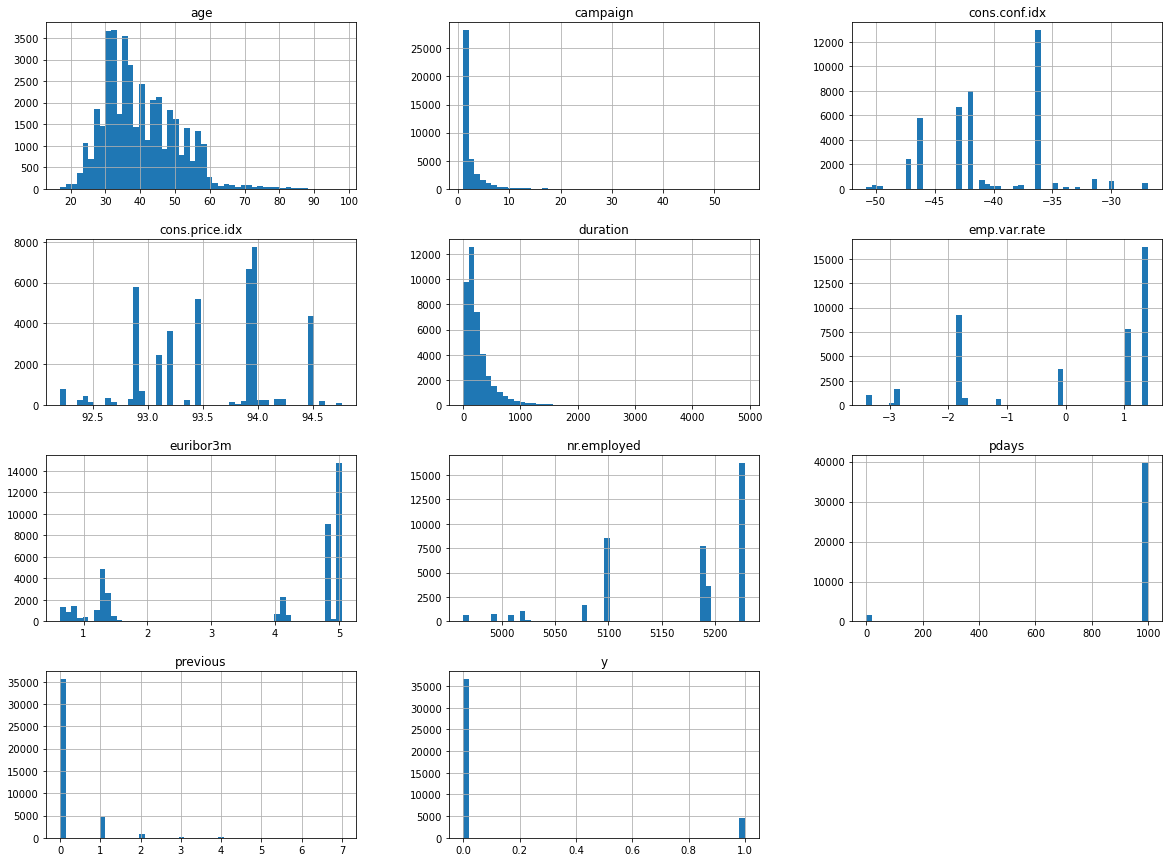

In [6]:
%matplotlib inline
df.hist(bins=50,figsize=(20,15))

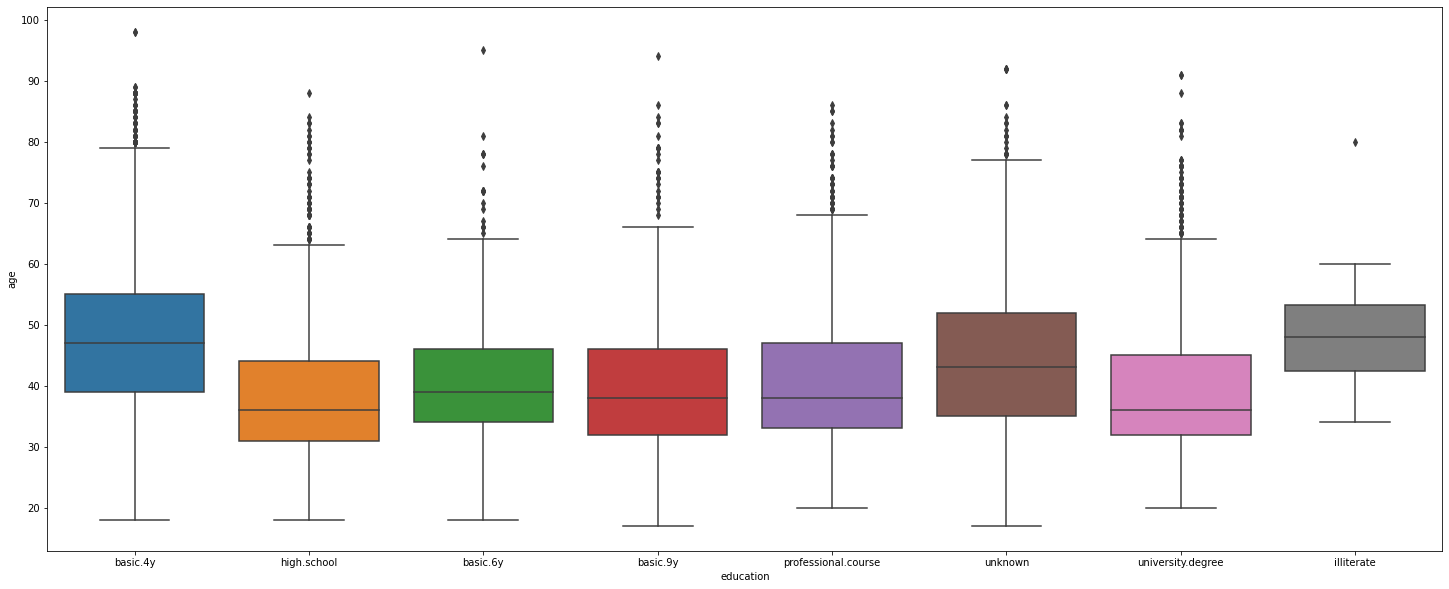

In [7]:
plt.figure(figsize=(25, 10))
sns.boxplot(x="education", y="age", data=df)

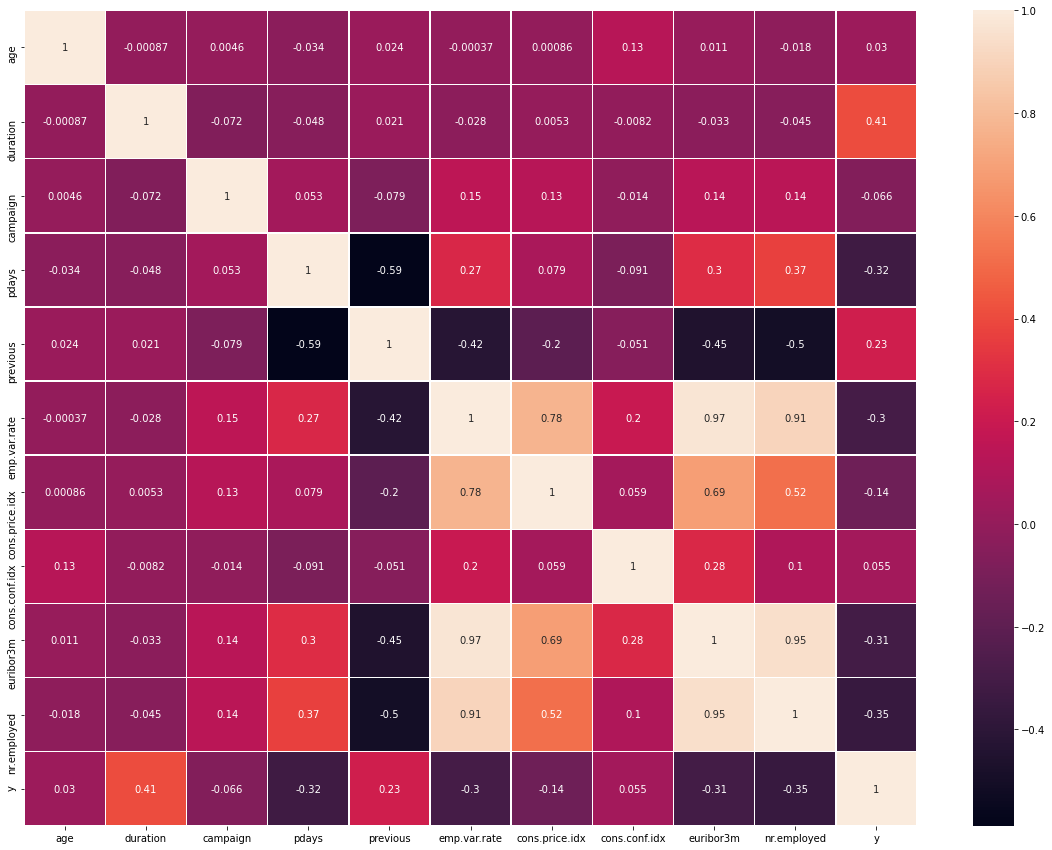

In [8]:
plt.figure(figsize=(20,15))  
sns.heatmap(df.corr(),annot=True,linewidths=.5)
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df['contact']     = labelencoder_X.fit_transform(df['contact']) 
df['month']       = labelencoder_X.fit_transform(df['month']) 
df['day_of_week'] = labelencoder_X.fit_transform(df['day_of_week'])
df['job'] = labelencoder_X.fit_transform(df['job'])
df['marital'] = labelencoder_X.fit_transform(df['marital'])
df['education'] = labelencoder_X.fit_transform(df['education'])
df['default'] = labelencoder_X.fit_transform(df['default'])
df['housing'] = labelencoder_X.fit_transform(df['housing'])
df['loan'] = labelencoder_X.fit_transform(df['loan'])
df['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [10]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [63]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)
X_train = train_set.drop('y', axis=1)
X_test = test_set.drop('y', axis=1)
Y_train = train_set.y
Y_test = test_set.y

In [64]:
class log_reg:
    def __init__(self, lr=0.05, num=50000, fit_=True, verb=False):
        self.lr, self.num, self.fit_, self.verb = lr, num, fit_, verb
    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def sigm(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_:
            X = self.add_intercept(X)
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num):
            z = np.dot(X, self.theta)
            h = self.sigm(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.sigm(z)
            loss = self.loss(h, y)
            
    
    def predict_prob(self, X):
        if self.fit_:
            X = self.add_intercept(X)
    
        return self.sigm(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [65]:
from sklearn.linear_model import LogisticRegression

def fit_pred(f, X_train, Y_train, X_test, Y_test):
    f.fit(X_train, Y_train)
    return (f.predict(X_test) == Y_test).mean()

def test(X_train, Y_train, X_test, Y_test):
    n_sklrn = fit_predict_show(LogReg(lr=0.1, num=100), X_train, Y_train, X_test, Y_test)
    print("Not sklearn : ", n_sklrn)
    sklrn = fit_pred(LogisticRegression(), X_train, Y_train, X_test, Y_test)
    print("Sklearn : ", sklrn)

In [66]:
test(X_train, Y_train, X_test, Y_test)

Not sklearn :  0.8943918426802622
Sklearn :  0.9116290361738286


In [67]:
from scipy.spatial import distance

class knn:
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.nearest(row)
            predictions.append(label)
        return predictions

    def nearest(self, row):
        best_dist = distance.euclidean(row, self.X_train[0])
        best_index = 0
        for i in range(1, len(self.X_train)):
            dist = distance.euclidean(row, self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i
        return self.Y_train[best_index]

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
    
def fit_pred(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train.values, Y_train.values)
    pred = model.predict(X_test.values)
    return accuracy_score(Y_test.values, pred)

def test(df):
    train_set, test_set = train_test_split(df[df.index < 500], test_size=0.3, random_state=42)
    X_train = train_set.drop('y', axis=1)
    X_test = test_set.drop('y', axis=1)
    Y_train = train_set.y
    Y_test = test_set.y
    
    n_sklrn = fit_pred(knn(), X_train, Y_train, X_test, Y_test)
    print("Not sklearn : ", n_sklrn)
    
    sklrn = fit_pred(KNeighborsClassifier(n_neighbors=1), X_train, Y_train, X_test, Y_test)
    print("Sklearn : ", sklrn)

In [69]:
test(df)

Not sklearn :  0.9866666666666667
Sklearn :  0.9866666666666667


In [70]:
import numpy as np
class decision_tree(object):
    
    def __init__(self, _max_depth, _min_splits):
        self.max_depth = _max_depth
        self.min_splits = _min_splits

    def fit(self, _feature, _label):
        self.feature = _feature
        self.label = _label
        self.train_data = np.column_stack((self.feature,self.label))
        self.build_tree()


    def gini(self, groups, class_labels):
        num_sample = sum([len(group) for group in groups])
        gini_score = 0

        for group in groups:
            size = float(len(group))

            if size == 0:
                continue
            score = 0.0
            for label in class_labels:
                porportion = (group[:,-1] == label).sum() / size
                score += porportion * porportion
            gini_score += (1.0 - score) * (size/num_sample)

        return gini_score

    def terminal_node(self, _group):
        class_labels, count = np.unique(_group[:,-1], return_counts= True)
        return class_labels[np.argmax(count)]

    def split(self, index, val, data):
        data_left = np.array([]).reshape(0,self.train_data.shape[1])
        data_right = np.array([]).reshape(0, self.train_data.shape[1])

        for row in data:
            if row[index] <= val:
                data_left = np.vstack((data_left,row))
            else:
                data_right = np.vstack((data_right, row))

        return data_left, data_right

    def best_split(self, data):
        class_labels = np.unique(data[:,-1])
        b_index = 777
        b_val = 777
        b_score = 777
        b_group = None

        for idx in range(data.shape[1]-1):
            for row in data:
                groups = self.split(idx, row[idx], data)
                gini_score = self.gini(groups,class_labels)

                if gini_score < b_score:
                    b_index = idx
                    b_val = row[idx]
                    b_score = gini_score
                    b_group = groups
        result = {}
        result['index'] = b_index
        result['val'] = b_val
        result['groups'] = b_group
        return result


    def split_branch(self, node, depth):
        left_node , right_node = node['groups']
        del(node['groups'])

        if not isinstance(left_node,np.ndarray) or not isinstance(right_node,np.ndarray):
            node['left'] = self.terminal_node(left_node + right_node)
            node['right'] = self.terminal_node(left_node + right_node)
            return

        if depth >= self.max_depth:
            node['left'] = self.terminal_node(left_node)
            node['right'] = self.terminal_node(right_node)
            return

        if len(left_node) <= self.min_splits:
            node['left'] = self.terminal_node(left_node)
        else:
            node['left'] = self.best_split(left_node)
            self.split_branch(node['left'],depth + 1)


        if len(right_node) <= self.min_splits:
            node['right'] = self.terminal_node(right_node)
        else:
            node['right'] = self.best_split(right_node)
            self.split_branch(node['right'],depth + 1)

    def build_tree(self):
        self.root = self.best_split(self.train_data)
        self.split_branch(self.root, 1)
        return self.root

    def _predict(self, node, row):
        if row[node['index']] < node['val']:
            if isinstance(node['left'], dict):
                return self._predict(node['left'], row)
            else:
                return node['left']

        else:
            if isinstance(node['right'],dict):
                return self._predict(node['right'],row)
            else:
                return node['right']

    def predict(self, test_data):
        self.predicted_label = np.array([])
        for idx in test_data:
            self.predicted_label = np.append(self.predicted_label, self._predict(self.root,idx))

        return self.predicted_label

In [71]:
from sklearn import tree

def test_decision_tree(df):
    train_set, test_set = train_test_split(df[df.index <= 500], test_size=0.3, random_state=42)
    X_train = train_set.drop('y', axis=1)
    X_test = test_set.drop('y', axis=1)
    Y_train = train_set.y
    Y_test = test_set.y
    model = decision_tree(2, 2)
    model.fit(X_train.values, Y_train.values)
    pred = model.predict(X_test.values)
    print("Not sklearn ", accuracy_score(Y_test.values, pred))
    model = tree.DecisionTreeClassifier()
    model.fit(X_train.values, Y_train.values)
    pred = model.predict(X_test.values)
    print("Sklearn ", accuracy_score(Y_test.values, pred))

In [72]:
test_decision_tree(df)

Not sklearn  0.9867549668874173
Sklearn  0.9602649006622517


In [73]:
import numpy as np
from scipy.stats import mode
from sklearn import tree



class random_forest(object):

    def __init__(
        self, n_estimators=32, max_features=8, max_depth=10,
        min_samples_split=2, bootstrap=0.9
        ):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.bootstrap = bootstrap
        self.forest = []


    def fit(self, X, y):
        self.forest = []
        n_samples = len(y)
        n_sub_samples = round(n_samples*self.bootstrap)
        
        for i in range(self.n_estimators):
            X_subset = X[:n_sub_samples]
            y_subset = y[:n_sub_samples]

            tree_ = tree.DecisionTreeClassifier()
            tree_.fit(X_subset, y_subset)
            self.forest.append(tree_)


    def predict(self, X):
        n_samples = X.shape[0]
        n_trees = len(self.forest)
        predictions = np.empty([n_trees, n_samples])
        for i in range(n_trees):
            predictions[i] = self.forest[i].predict(X)

        return mode(predictions)[0][0]


    def score(self, X, y):
        y_predict = self.predict(X)
        n_samples = len(y)
        correct = 0
        for i in xrange(n_samples):
            if y_predict[i] == y[i]:
                correct = correct + 1
        accuracy = correct/n_samples
        return accuracy

SyntaxError: invalid syntax (<ipython-input-73-44fb6a945892>, line 9)

In [38]:
from sklearn.ensemble import RandomForestClassifier

def test(df):
    train_set, test_set = train_test_split(df[df.index < 500], test_size=0.3, random_state=42)
    X_train = train_set.drop('y', axis=1)
    X_test = test_set.drop('y', axis=1)
    Y_train = train_set.y
    Y_test = test_set.y
    model = RF()
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    print("Not sklearn ", accuracy_score(Y_test, pred))
    model = RandomForestClassifier()
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    print("Sklearn ", accuracy_score(Y_test, pred))

In [39]:
test_rf(df)

Not sklearn  0.9800664451827242
Sklearn  0.9900332225913622
